<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: ....,Neidy Malaga,... (Alphabetical Order)



#### Step 1: Beginning Setup

Our project compares Product Category and Marital Status over Purchase. We start by using pandas to read our data from an Excel file and display it to prove it was read well.

In [7]:
import pandas as pd

Walmart_Data = pd.read_csv('walmart.csv')
Walmart_Data['Product_Category'] = Walmart_Data['Product_Category'].astype('uint8')
Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint8')
Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})

Walmart_Data.head()

Product_Over_Purchase = pd.DataFrame({'Product_Category': Walmart_Data['Product_Category'],'Purchase': Walmart_Data['Purchase']})
Marital_Over_Purchase = pd.DataFrame({'Marital_Status': Walmart_Data['Marital_Status'],'Purchase': Walmart_Data['Purchase']})


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are trying to measure Product Category and Marital Status over Purchases. Purchases will be the response variable (y-val) and Product Category and Marital Status will be the explanatory variable (x-val).

The following code block will show the scatterplot. Based on the scatterplot, we can see that it has a few outliers and that most of the data is 'clustered' to the bottom. We can imply that 2-3 clusters can cover the data, and use this information to confirm our methods in Step 3 when we perform a cluster.


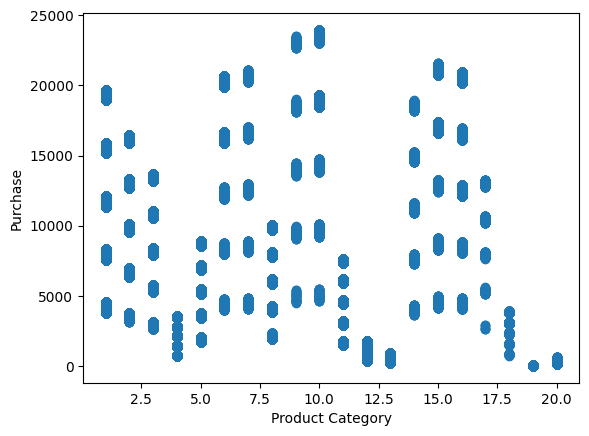

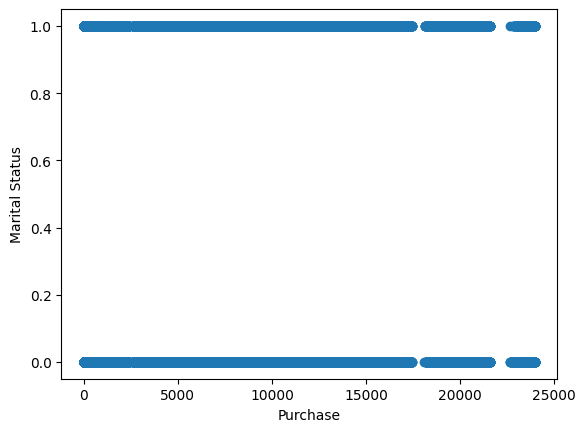

In [4]:
import matplotlib.pyplot as plt

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(Product_Over_Purchase['Product_Category'], Product_Over_Purchase['Purchase'])
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()

plt.scatter(Marital_Over_Purchase['Purchase'], Marital_Over_Purchase['Marital_Status'])
plt.xlabel('Purchase')
plt.ylabel('Marital Status')
plt.show()




#### Step 3: Clustering Data
In order to cluster data, we will use K-Means algorithm.

Credit: https://www.w3schools.com/python/python_ml_k-means.asp

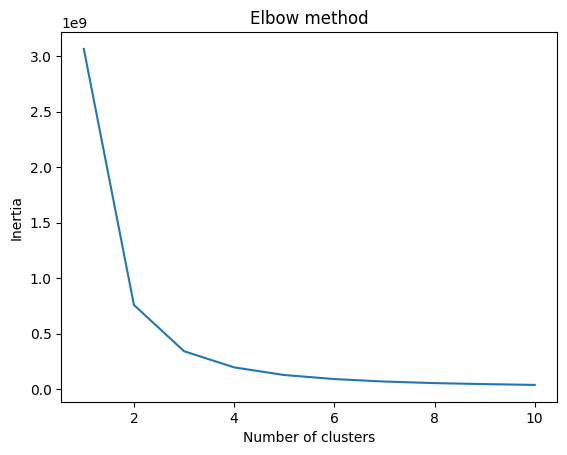

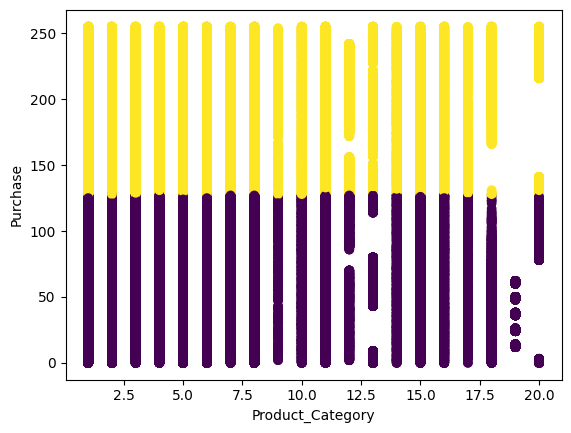

In [17]:
from sklearn.cluster import KMeans

#Elbow Method
inertia = []

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Product_Over_Purchase)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Product_Over_Purchase)

plt.scatter(Product_Over_Purchase['Product_Category'], Product_Over_Purchase['Purchase'], c=kmeans.labels_)
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()


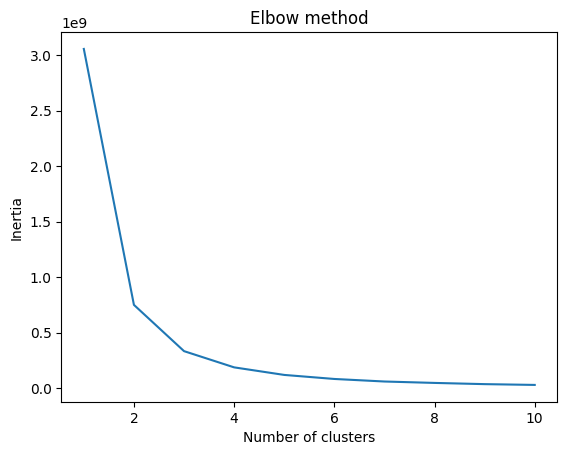

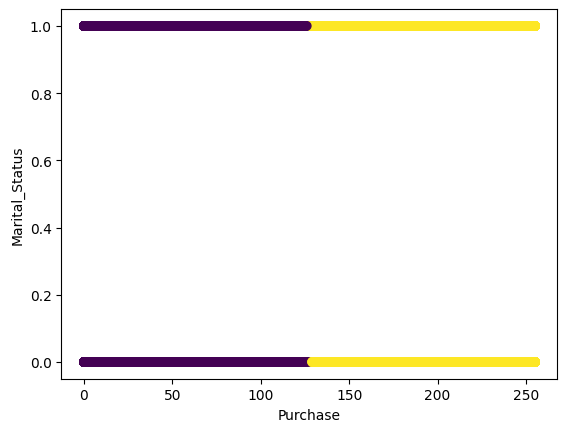

In [18]:
#Elbow Method
inertia.clear()

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Marital_Over_Purchase)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Marital_Over_Purchase)

plt.scatter(Marital_Over_Purchase['Purchase'], Marital_Over_Purchase['Marital_Status'], c=kmeans.labels_)
plt.xlabel('Purchase')
plt.ylabel('Marital Status')
plt.show()


#### Step 3: Classification

Random Forest should be correct: validation and training accuracy are close and high values 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate

# 
x = Product_Over_Purchase.drop('Product_Category', axis=1)
y = Product_Over_Purchase['Purchase']

#splits into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25)

rf = RandomForestClassifier(max_depth=17)
rf.fit(X_train, Y_train)


#trains model
# print('Training Accuracy : ', 
#       metrics.accuracy_score(Y_train,
#                              rf.predict(X_train))*100)
# print('Validation Accuracy : ', 
#       metrics.accuracy_score(Y_test, 
#                              rf.predict(X_test))*100)


RandomForestClassifier(max_depth=17)

In [10]:
cv = cross_validate(rf,x,y, return_train_score=True)

KeyboardInterrupt: 

https://www.geeksforgeeks.org/understanding-logistic-regression/

Logistic Regression
Possible Error: Overfitting (100 percent for both is suspicous)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y =  Marital_Over_Purchase['Marital_Status']
x = Marital_Over_Purchase.drop('Purchase',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

clf = LogisticRegression(penalty='l2')
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)

print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,
                             clf.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_test, 
                             clf.predict(X_test))*100)


Training Accuracy :  100.0
Validation Accuracy :  100.0


https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn?irclickid=WuFREi2XYxyKROHzIjScF1YNUkHXA5U5QXLp0w0&irgwc=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow - KNN

Possible Error: Overfitting ???

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = Walmart_Data.drop('Product_Category', axis=1)
y = Walmart_Data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Training Accuracy : ', acc*100)


Training Accuracy :  99.95091533804789


Naive Bayes
Possible Error: Overfitting (100 percent for both is suspicous)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x = Walmart_Data.drop('Product_Category', axis=1)
y = Walmart_Data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

MB = GaussianNB()
MB.fit(X_train, y_train)

print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             MB.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             MB.predict(X_test))*100)

Training Accuracy :  100.0
Validation Accuracy :  100.0
